
ENUNCIADO: Supongamos que usted trabaja en el servicio de salud y recibe muestras que provienen de mujeres con cáncer de mama. Los médicos han extraído características y las han anotado, su trabajo es crear un modelo que sea capaz de identificar si un paciente tiene o no cáncer. Recordemos que un falso positivo no es tan preocupante como un falso negativo, ya que en el futuro se le hacen más pruebas a las pacientes y hay oportunidades de descubrir que estábamos en un error.
Sin embargo, un falso negativo puede llevar a que el cáncer se desarrolle sin supervisión durante más tiempo del necesario y podría llevar a daños más graves o incluso la muerte de la paciente. Teniendo esto en cuenta, desarrolla un modelo que funcione lo mejor posible y explica qué decisiones has tomado en su elaboración y por que.

A entregar:
- Link a un repositorio público de Github que contenga al menos:
- Un archivo Jupyter Notebook con todas las celdas ejecutadas en orden. Es decir, que antes de subir el archivo a github habéis limpiado el notebook y luego lo habéis ejecutado desde el principio.
- Un archivo Readme en el que se explica el proyecto y el ejercicio. Tened en cuenta
que este repositorio puede serviros como CV en el futuro y que los recruiters suelen
mirar los archivos Readme.md
- Una carpeta data con el dataset.
En el notebook debe aparecer el proceso de preprocesado de datos desde los archivos
originales a ser posible.
En el notebook debéis probar al menos con 3 modelos, evaluarlos y decidir cual es el mejor,
justificando la respuesta en base a las matrices de confusión que aparecen al evaluar el
error en training y en test.
El dataset y su descripción aparecen aquí:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [1]:
#ALUMNO: JIMMY RIVERA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos
columns = ['ID', 'Diagnosis'] + [f'caracteristica_{i}' for i in range(1, 31)]
data = pd.read_csv('data/wdbc.data', header=None, names=columns, sep=",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 569 non-null    int64  
 1   Diagnosis          569 non-null    object 
 2   caracteristica_1   569 non-null    float64
 3   caracteristica_2   569 non-null    float64
 4   caracteristica_3   569 non-null    float64
 5   caracteristica_4   569 non-null    float64
 6   caracteristica_5   569 non-null    float64
 7   caracteristica_6   569 non-null    float64
 8   caracteristica_7   569 non-null    float64
 9   caracteristica_8   569 non-null    float64
 10  caracteristica_9   569 non-null    float64
 11  caracteristica_10  569 non-null    float64
 12  caracteristica_11  569 non-null    float64
 13  caracteristica_12  569 non-null    float64
 14  caracteristica_13  569 non-null    float64
 15  caracteristica_14  569 non-null    float64
 16  caracteristica_15  569 non

In [3]:
# Convertir el diagnóstico en una variable binaria (M = 1, B = 0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
data.describe()

,ID,Diagnosis,caracteristica_1,caracteristica_2,caracteristica_3,caracteristica_4,caracteristica_5,caracteristica_6,caracteristica_7,caracteristica_8,...,caracteristica_21,caracteristica_22,caracteristica_23,caracteristica_24,caracteristica_25,caracteristica_26,caracteristica_27,caracteristica_28,caracteristica_29,caracteristica_30
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
# Separar las características y las etiquetas
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']
X

,caracteristica_1,caracteristica_2,caracteristica_3,caracteristica_4,caracteristica_5,caracteristica_6,caracteristica_7,caracteristica_8,caracteristica_9,caracteristica_10,...,caracteristica_21,caracteristica_22,caracteristica_23,caracteristica_24,caracteristica_25,caracteristica_26,caracteristica_27,caracteristica_28,caracteristica_29,caracteristica_30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Función para entrenar modelos y generar gráficos
def train_and_evaluate_model(model, model_name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    error_rate = 1 - accuracy
    print(f"{model_name} - Reporte de clasificación:\n{classification_report(y_test, y_pred)}")
    print(f"Tasa de Presición: {accuracy*100:.2f}%")
    print(f"Tasa de Error: {error_rate*100:.2f}%")
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
    plt.ylabel('Actual')
    plt.xlabel('Predicho')
    plt.title(f'Matriz de Confusion para {model_name}')
    plt.show()

Regresión logística - Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Tasa de Presición: 97.37%
Tasa de Error: 2.63%


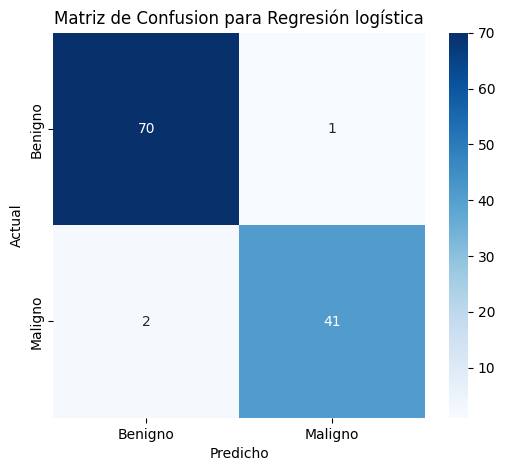

In [7]:
# Regresión Logística
model_lr = LogisticRegression(max_iter=10000)
train_and_evaluate_model(model_lr, "Regresión logística")

Random Forest - Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Tasa de Presición: 96.49%
Tasa de Error: 3.51%


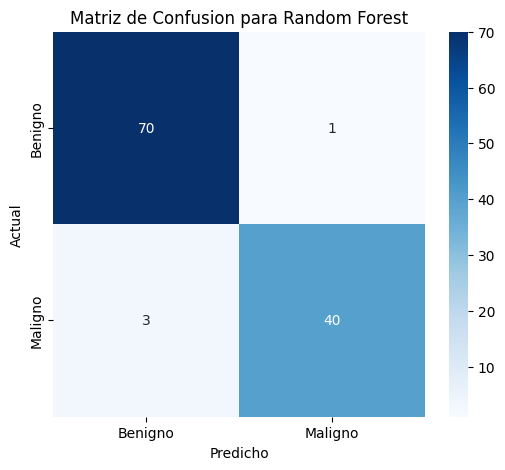

In [8]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=100)
train_and_evaluate_model(model_rf, "Random Forest")

Gradient Boosting Classifier - Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Tasa de Presición: 95.61%
Tasa de Error: 4.39%


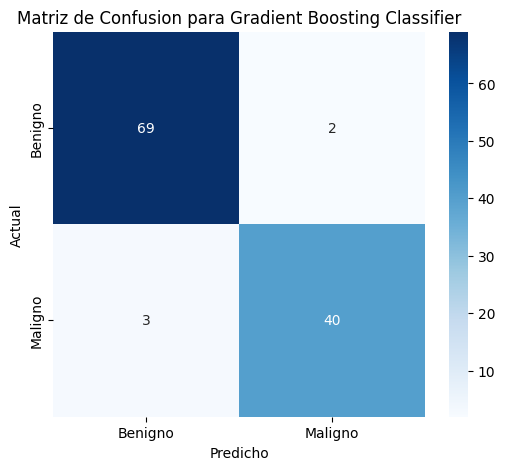

In [9]:
# Gradient Boosting Classifier
model_gb = GradientBoostingClassifier()
train_and_evaluate_model(model_gb, "Gradient Boosting Classifier")